### IAA002 - LPA - Trabalho
---

#### Importação de bibliotecas

In [511]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

---
### 1 Análise Exploratória dos dados


a. Carregue a base de dados media_precos_carros_brasil.csv

In [512]:
precos_carros_df = pd.read_csv('precos_carros_brasil.csv')
precos_carros_df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [513]:
precos_carros_df.shape

(267542, 11)

b. Verifique se há valores faltantes nos dados

In [514]:
precos_carros_df.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

cont b. Caso haja valores faltantes, escolha uma tratativa para resolver o problema de valores faltantes. 

A trativa escolhida foi a remoção das linhas em branco.

In [515]:
precos_carros_df.dropna(how='all', inplace=True)
precos_carros_df.shape

(202297, 11)

c. Verifique se há dados duplicados nos dados

In [516]:
precos_carros_df.duplicated().sum()

2

cont c. removendo dois itens duplicados

In [517]:
precos_carros_df.drop_duplicates(inplace=True)
precos_carros_df.shape

(202295, 11)

d. Crie duas categorias, para separar colunas numéricas e categóricas. 

In [518]:

numericas_cols = [col for col in precos_carros_df.columns if precos_carros_df[col].dtype != 'object']
categoricas_cols = [col for col in precos_carros_df.columns if precos_carros_df[col].dtype == 'object']

cont d. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [519]:
precos_carros_df[numericas_cols].describe().round(1)

,year_of_reference,year_model,avg_price_brl
count,202295.0,202295.0,202295.0
mean,2021.6,2011.3,52756.8
std,0.6,6.4,51628.9
min,2021.0,2000.0,6647.0
25%,2021.0,2006.0,22855.0
50%,2022.0,2012.0,38027.0
75%,2022.0,2016.0,64064.0
max,2023.0,2023.0,979358.0


In [520]:
precos_carros_df[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [521]:
precos_carros_df['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [522]:
precos_carros_df['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

#### f. Dê um breve explicação (máximo de quatro linhas) sobre os principais resultados encontrados na Análise Exploratória dos dados

* A marca mais vendida em 2021 foi a Fiat com 44962 carros vendidos.
* Os modelos mais vendido em 2021 foram Palio Week. Adv/Adv TRYON 1.8 mpi Flex e Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p, ambos com 425 unidades vendidas.
* O mês com mais vendas foi o de Janeiro/2021, totalizando 24260 carros.
* O preço médio dos veículos vendidos em 2021 foi de R$ 52.756.80

---
### 2 Visualização dos dados

a. Gere um gráfico da distribuição da quantidade de carros por marca

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64


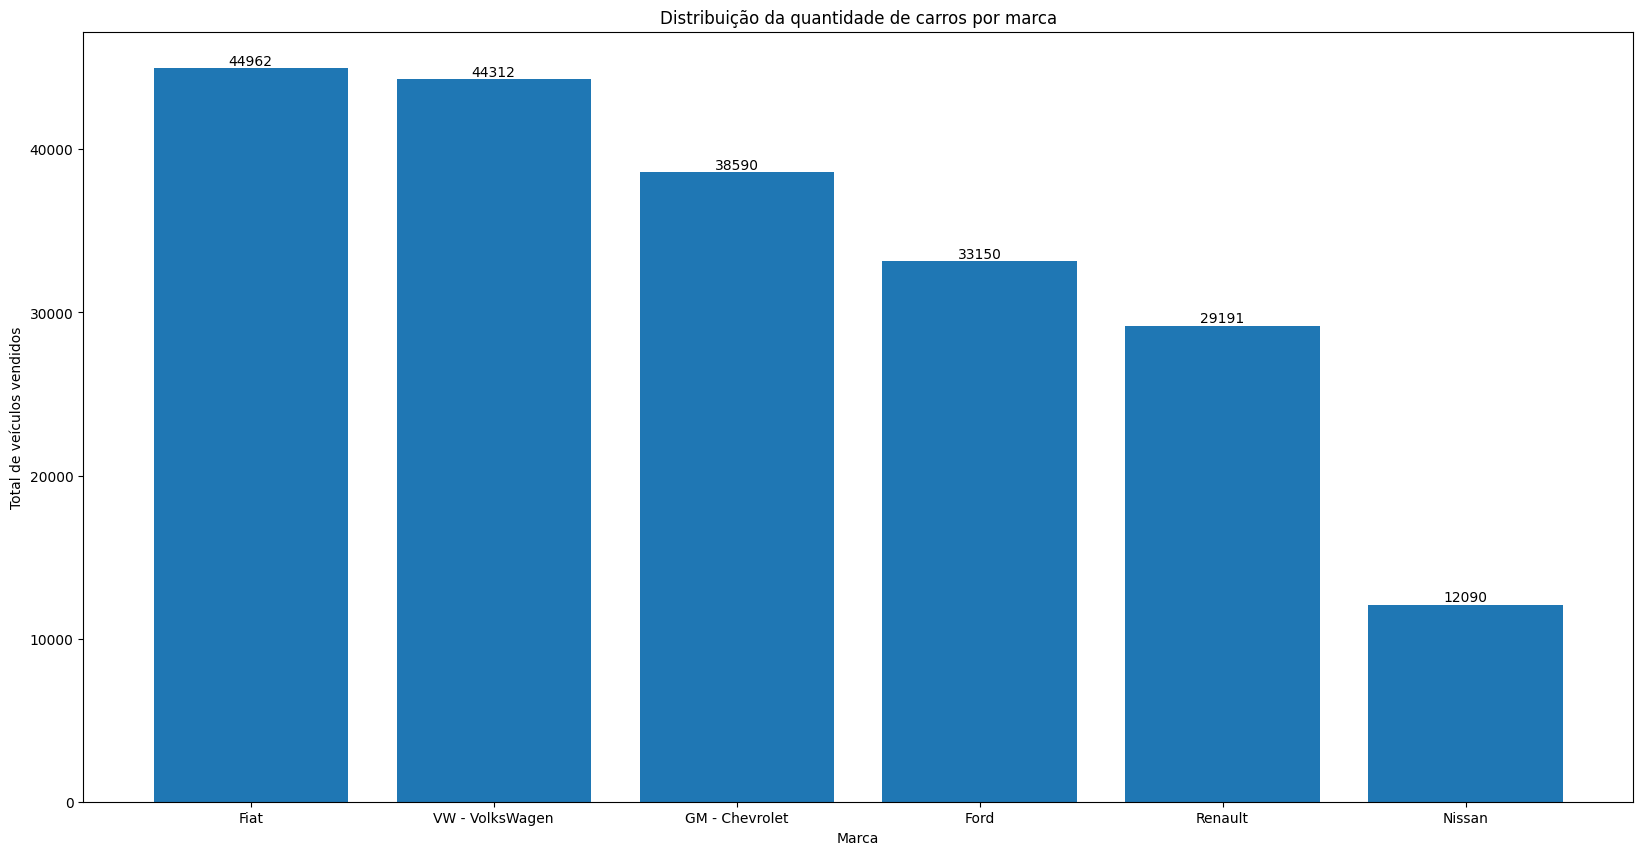

In [523]:
agrupador_carros_por_marca = precos_carros_df['brand'].value_counts()
print(agrupador_carros_por_marca)
plt.figure(figsize=(20,10))
grafico_carros_por_marca = plt.bar(agrupador_carros_por_marca.index, agrupador_carros_por_marca.values)
plt.title('Distribuição da quantidade de carros por marca')
plt.xlabel('Marca')
plt.ylabel('Total de veículos vendidos')
plt.bar_label(grafico_carros_por_marca, size=10)
plt.show()

b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro (gear)

gear
manual       161883
automatic     40412
Name: count, dtype: int64


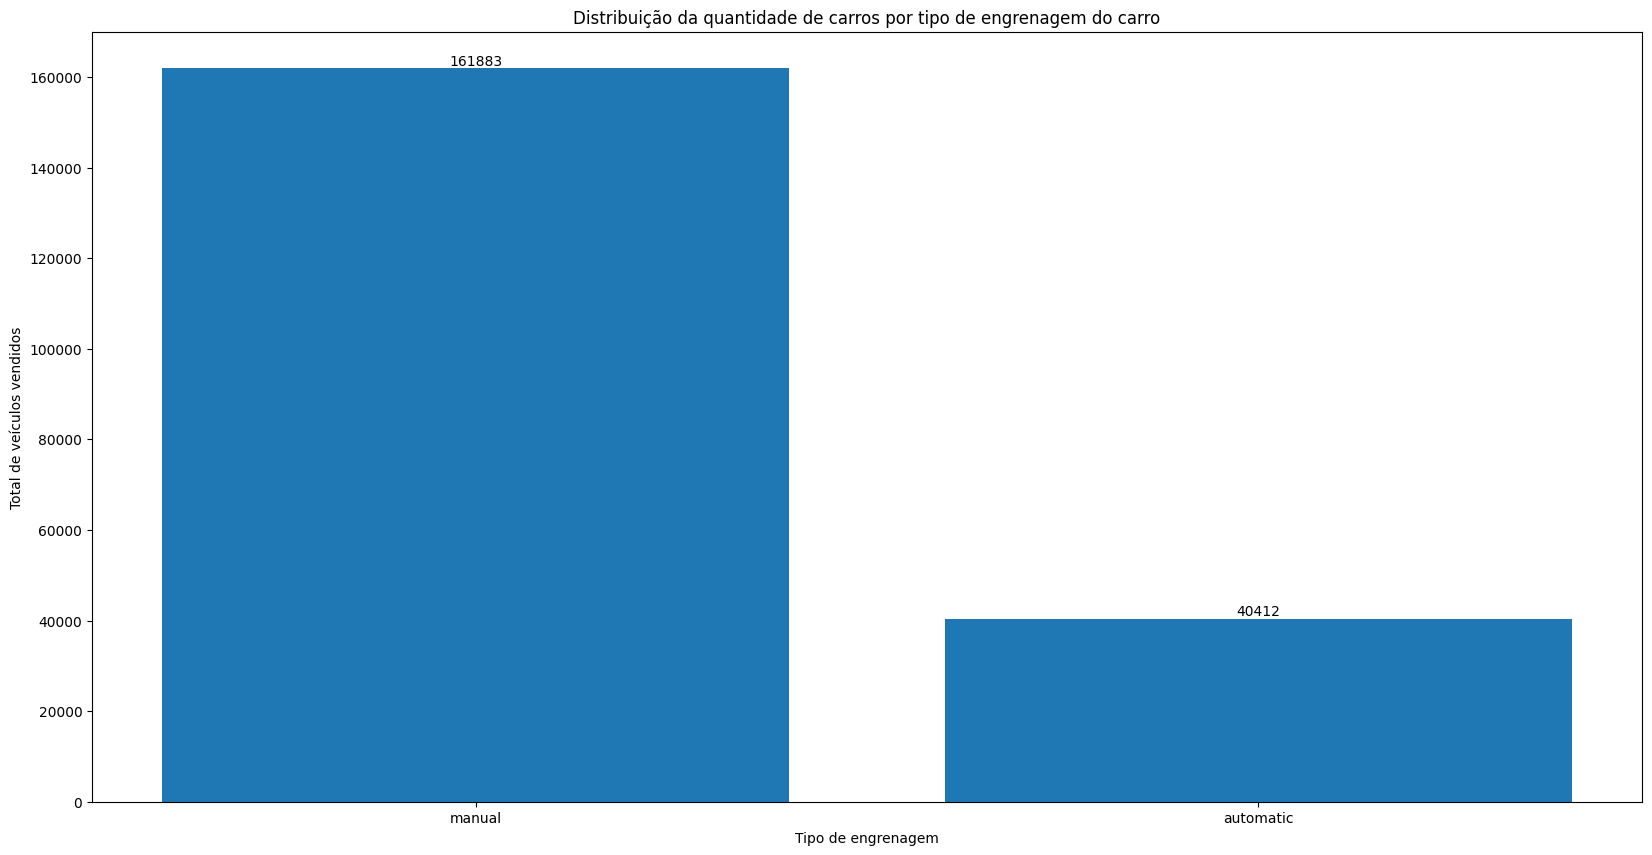

In [524]:

agrupador_carros_por_engrenagem = precos_carros_df['gear'].value_counts()
print(agrupador_carros_por_engrenagem)
plt.figure(figsize=(20,10))
grafico_carros_por_engrenagem = plt.bar(agrupador_carros_por_engrenagem.index, agrupador_carros_por_engrenagem.values)
plt.title('Distribuição da quantidade de carros por tipo de engrenagem do carro')
plt.xlabel('Tipo de engrenagem')
plt.ylabel('Total de veículos vendidos')
plt.bar_label(grafico_carros_por_engrenagem, size=10)
plt.show()

c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

month_of_reference
January      51905.0
February     49197.0
March        50083.0
April        50849.0
May          51481.0
June         52514.0
July         53059.0
August       53664.0
September    54405.0
October      54903.0
November     55468.0
December     55848.0
Name: avg_price_brl, dtype: float64


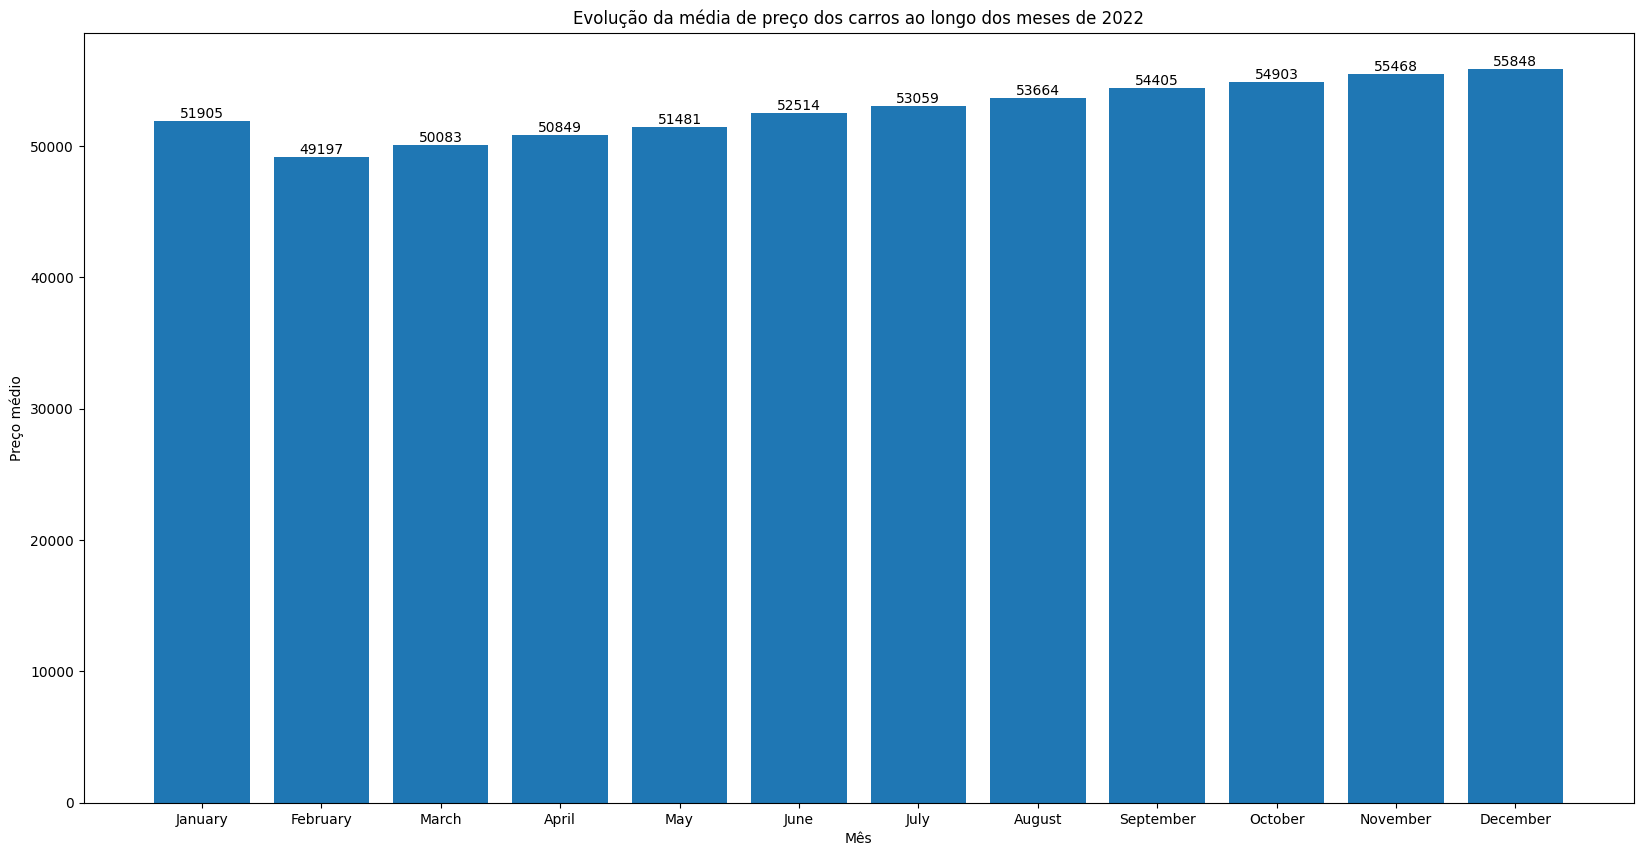

In [525]:
media_preco_mes = precos_carros_df.groupby(['month_of_reference'])['avg_price_brl'].mean().round(0)
ordem_meses = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
media_preco_mes = media_preco_mes.reindex(ordem_meses)
print(media_preco_mes)
plt.figure(figsize=(20,10))
grafico_media_preco = plt.bar(media_preco_mes.index, media_preco_mes.values)
plt.title('Evolução da média de preço dos carros ao longo dos meses de 2022')
plt.xlabel('Mês')
plt.ylabel('Preço médio')
plt.bar_label(grafico_media_preco, size=10)
plt.show()

d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

In [526]:
media_preco_marca_eng = precos_carros_df.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(0)
media_preco_marca_eng = media_preco_marca_eng.reset_index(name='avg_price')
media_preco_marca_eng.head()

,brand,gear,avg_price
0,Fiat,automatic,97397.0
1,Fiat,manual,39694.0
2,Ford,automatic,84769.0
3,Ford,manual,51784.0
4,GM - Chevrolet,automatic,88157.0


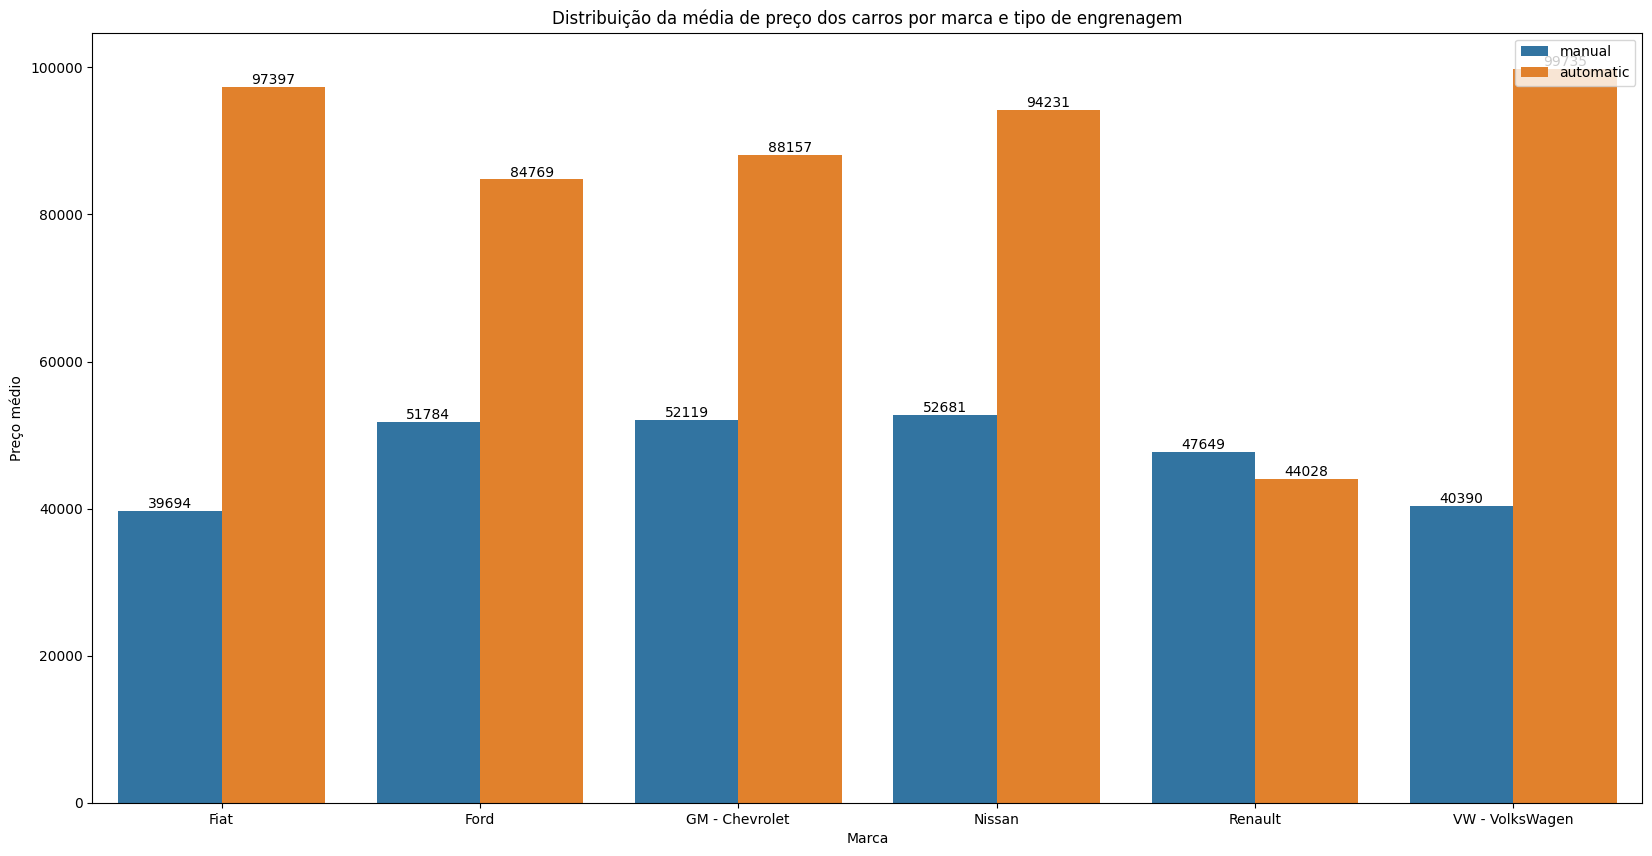

In [527]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='brand', y='avg_price', hue='gear', data=media_preco_marca_eng, hue_order=['manual', 'automatic'], ax=ax)
plt.title('Distribuição da média de preço dos carros por marca e tipo de engrenagem')
plt.xlabel('Marca')
plt.ylabel('Preço médio')
plt.legend(loc="upper right")

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

e. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item d
* Os carros com maior preço médio são automáticos, exceto os carros da marca Renault.
* A Renault tem o menor preço médio para veículos de câmbio automático.
* Para os carros de câmbio manual, a Nissan possui os veículos com maior preço médio.
* Já para os carros de câmbio automático, a VW - VolksWagen possui os veículos com maior preço médio.



f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

In [528]:
media_preco_marca_comb = precos_carros_df.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(0)
media_preco_marca_comb = media_preco_marca_comb.reset_index(name='avg_price')
media_preco_marca_comb.head()

,brand,fuel,avg_price
0,Fiat,Alcohol,11510.0
1,Fiat,Diesel,99814.0
2,Fiat,Gasoline,37197.0
3,Ford,Alcohol,10149.0
4,Ford,Diesel,94526.0


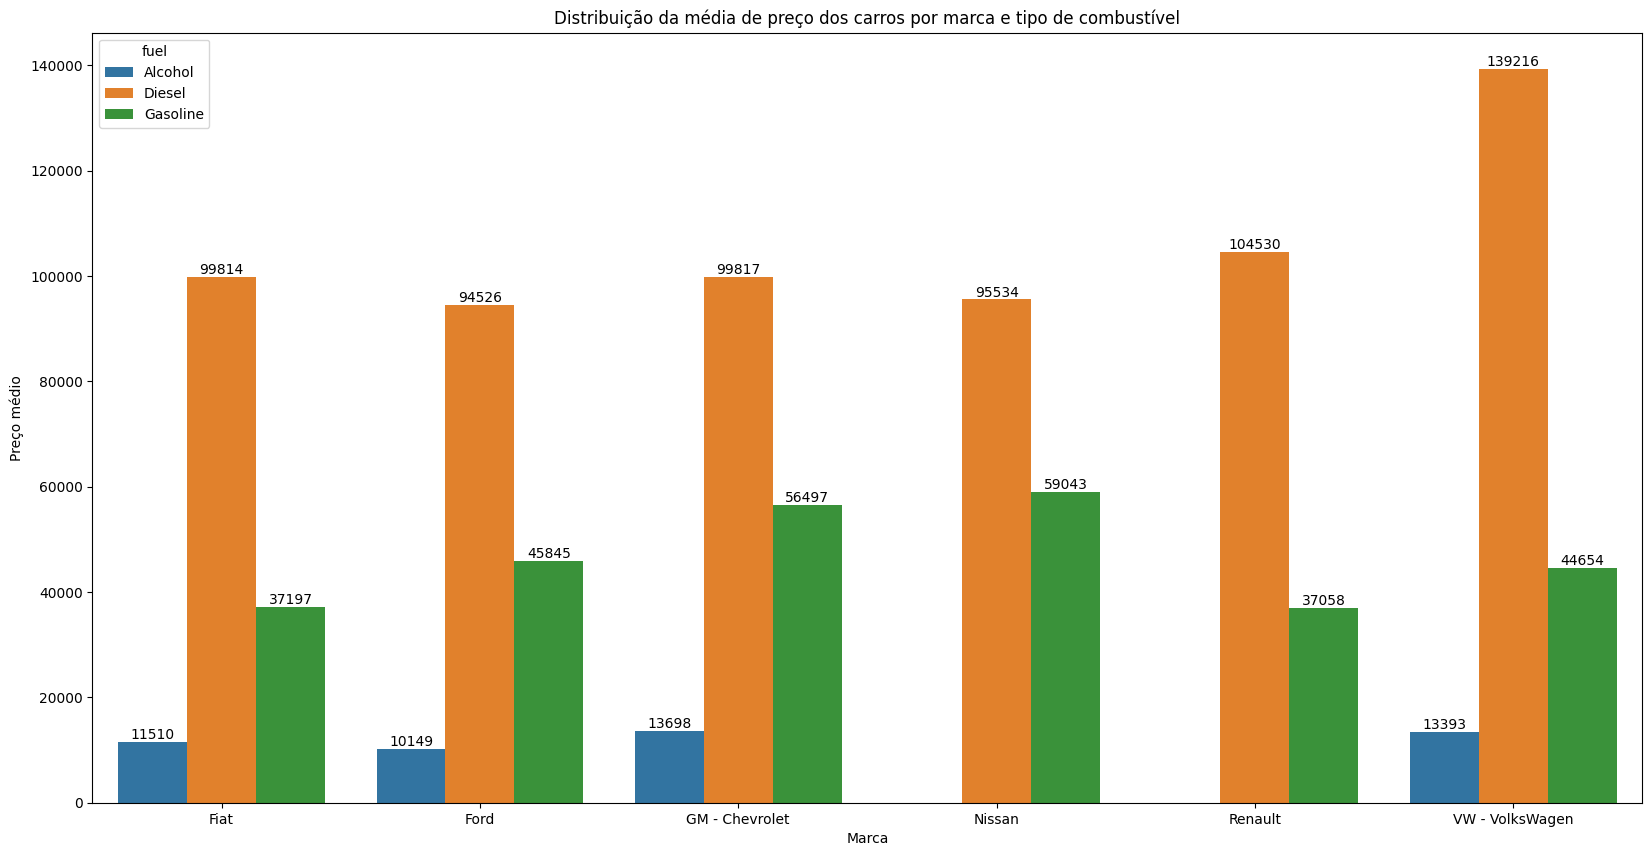

In [529]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=media_preco_marca_comb, x='brand', y='avg_price', hue='fuel', ax=ax)
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.title('Distribuição da média de preço dos carros por marca e tipo de combustível')
plt.xlabel('Marca')
plt.ylabel('Preço médio')
plt.show()

g. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados no item f

* Nissan e Renault não possui vendas de veículos movidos a álcool.
* A VW - VolksWagen tem o maior preço médio para veículos a diesel.
* A Nissan e a GM - Chevrolet apresentam as maiores médias para veículos à gasolina.
* A GM - Chevrolet apresenta as maiores médias para veículos movidos a álcool.

---
### 3 Aplicação de modelos de machine learning para prever o preço médio dos carros

a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo

In [530]:
# começando com as variáveis que já foram definidas anteriormente.
dados_num = precos_carros_df[numericas_cols]
dados_num_extra_cols = precos_carros_df[numericas_cols]
dados_num.head()

,year_of_reference,year_model,avg_price_brl
0,2021.0,2002.0,9162.0
1,2021.0,2001.0,8832.0
2,2021.0,2000.0,8388.0
3,2021.0,2000.0,8453.0
4,2021.0,2001.0,12525.0


In [531]:
# Transformando a variável categórica 'gear' para numérica utilizando a técnico LabelEnconder pois os modelos que iremos treinar conseguem lidar com valores numéricos diretamente.
# após a transformação será analisado a correlação com a variável target e então decidir por considerar ou não.
precos_carros_df['gear'].value_counts()
dados_num_extra_cols['gear_num'] = LabelEncoder().fit_transform(precos_carros_df['gear'])
dados_num_extra_cols.head()

,year_of_reference,year_model,avg_price_brl,gear_num
0,2021.0,2002.0,9162.0,1
1,2021.0,2001.0,8832.0,1
2,2021.0,2000.0,8388.0,1
3,2021.0,2000.0,8453.0,1
4,2021.0,2001.0,12525.0,1


In [532]:
# Transformando a variável categórica 'fuel' para numérica utilizando a mesma técnica e racional para a variável 'gear'
# após a transformação também será analisada a correlação com a variável target.
precos_carros_df['fuel'].value_counts()
dados_num_extra_cols['fuel_num'] = LabelEncoder().fit_transform(precos_carros_df['fuel'])
dados_num_extra_cols.head()

,year_of_reference,year_model,avg_price_brl,gear_num,fuel_num
0,2021.0,2002.0,9162.0,1,2
1,2021.0,2001.0,8832.0,1,2
2,2021.0,2000.0,8388.0,1,2
3,2021.0,2000.0,8453.0,1,0
4,2021.0,2001.0,12525.0,1,2


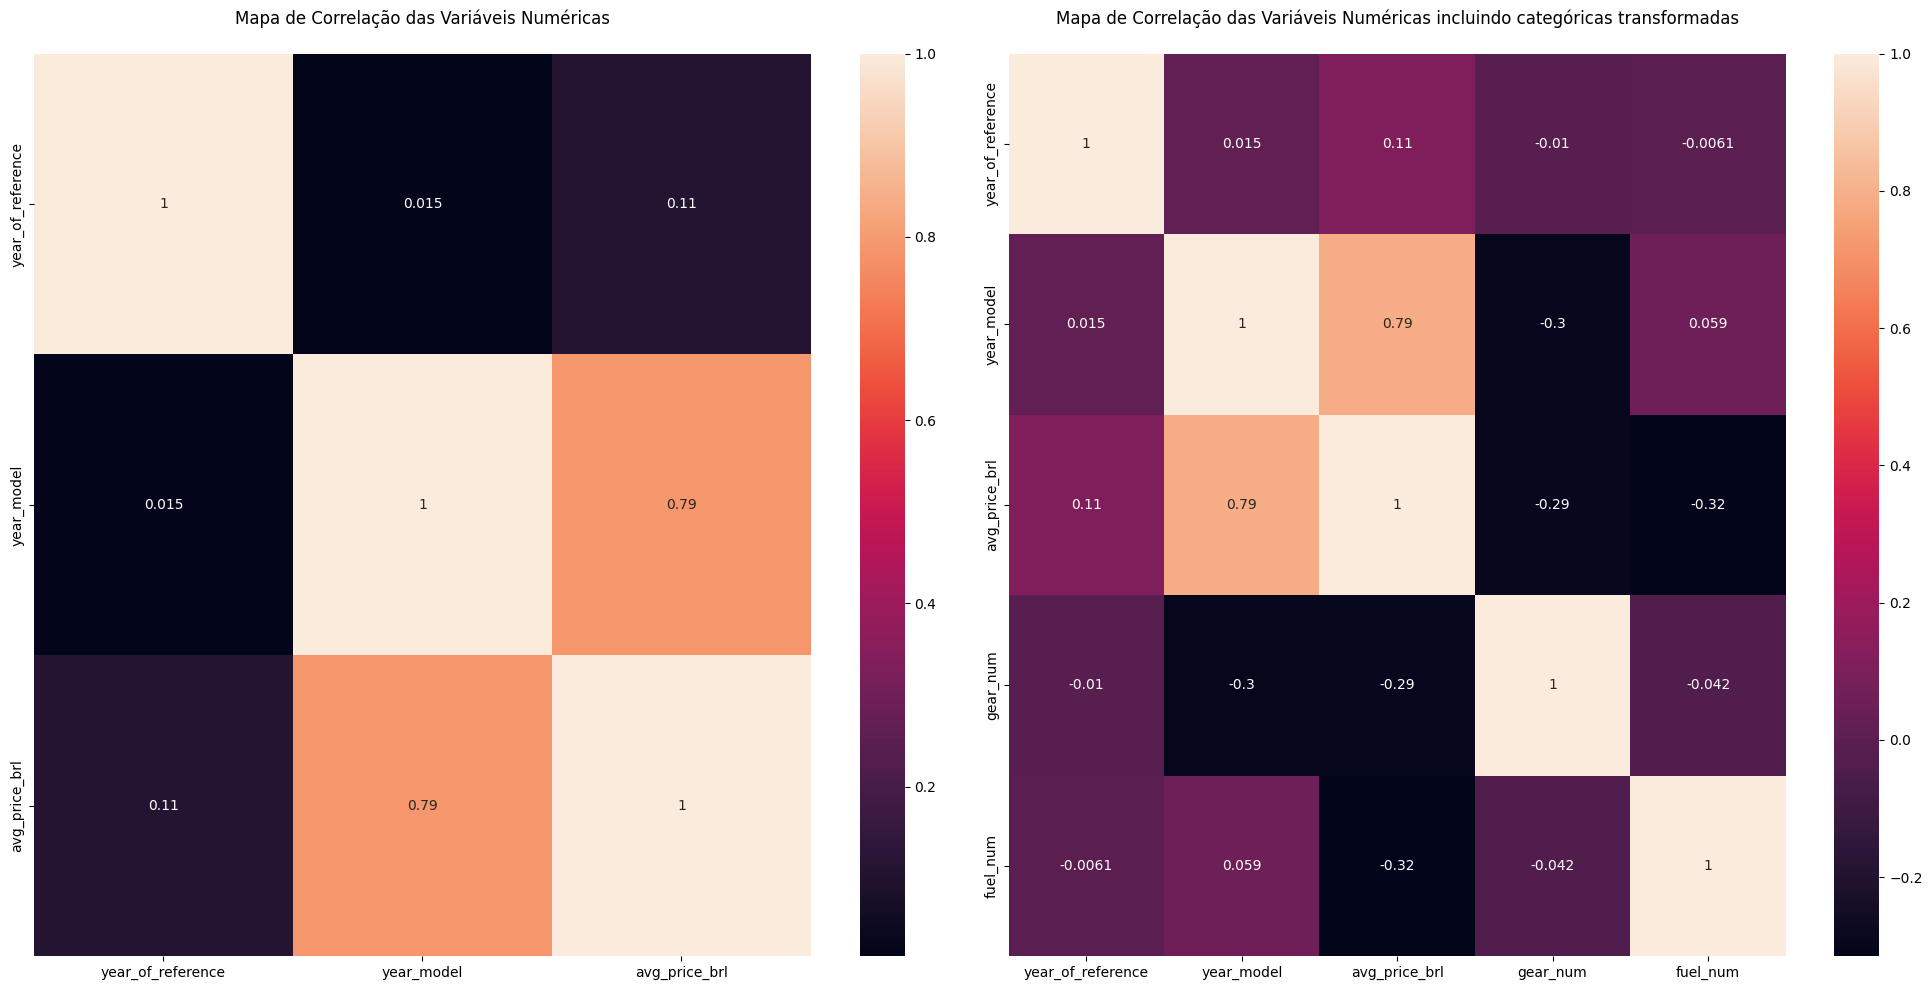

In [533]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Mapeando a correção das variáveis numéricas com a variável target 'avg_price_brl'
sns.heatmap(data=dados_num.corr('spearman'), annot=True, ax=axes[0])
axes[0].set_title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 12)

# Mapeando a correção das variáveis numéricas e categóricas transformadas om a variável target 'avg_price_brl'
sns.heatmap(data=dados_num_extra_cols.corr('spearman'), annot=True, ax=axes[1])
axes[1].set_title("Mapa de Correlação das Variáveis Numéricas incluindo categóricas transformadas\n", fontsize = 12)

plt.tight_layout()
plt.show()

- Analisando a correlação da variável target 'avg_price_brl' é possível notar que a variável 'year_of_reference' possui uma correlação fraca com o valor do médio do veículo, porém contribui com o valor, já as variáveis 'gear_num' e 'fuel_num' tem uma relação inversamente proporcional do tipo fraca para médio.

Vamos realizar vários experimentos considerando considerando os dois cenários acima.
Abaixo a lista de experimentos que serão validados:

* experimento_1 : Modelo RandomForestRegressor sem parâmetros utilizando somente as variáveis numéricas originais **year_of_reference** e **year_model**.
* experimento_2 : Modelo RandomForestRegressor sem parâmetros utilizando as variáveis numéricas **year_of_reference** e **year_model** + variáveis categóricas **gear** e **fuel** transformadas.
* experimento_3 : Modelo RandomForestRegressor **com** parâmetros utilizando as variáveis numéricas **year_of_reference** e **year_model** + variáveis categóricas **gear** e **fuel** transformadas.
* experimento_4 : Modelo XGBRegressor utilizando as variáveis numéricas originais **year_of_reference** e **year_model**.
* experimento_5 : Modelo XGBRegressor utilizando as variáveis numéricas **year_of_reference** e **year_model** + variáveis categóricas **gear** e **fuel** 

In [534]:
# X conterá os dados das variáveis year_of_reference e year_model.
X = dados_num.drop('avg_price_brl', axis=1)
X.head()

,year_of_reference,year_model
0,2021.0,2002.0
1,2021.0,2001.0
2,2021.0,2000.0
3,2021.0,2000.0
4,2021.0,2001.0


In [535]:
# y será a variável target 
y = dados_num['avg_price_brl']
y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

In [536]:
# X_extra_cols conterá os dados das variáveis year_of_reference e year_model + as categóricas transformadas: gear_num e fuel_num
X_extra_cols = dados_num_extra_cols.drop('avg_price_brl', axis=1)
# y_extra será a variável target
y_extra_cols = dados_num_extra_cols['avg_price_brl']
X_extra_cols.head()

,year_of_reference,year_model,gear_num,fuel_num
0,2021.0,2002.0,1,2
1,2021.0,2001.0,1,2
2,2021.0,2000.0,1,2
3,2021.0,2000.0,1,0
4,2021.0,2001.0,1,2


b. Crie partições contendo 75% dos dados para treino e 25% para teste

In [537]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [538]:
# criando partições contendo 75% dos dados para treino e 25% para teste considerando variáveis categóricas fuel e gear transformadas para numéricas
X_train_extra, X_test_extra, y_train_extra, y_test_extra = train_test_split(X_extra_cols, y_extra_cols, test_size=0.25, random_state=42)

c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros. 

Observação: caso julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique quais parâmetros foram inputados e indique o treinamento de cada modelo

In [539]:
# experimento_1: 
# - Modelo RandomForestRegressor sem parâmetros
# - somente variáveis numéricas year_of_reference e year_model
model_rfr_no_params = RandomForestRegressor()
model_rfr_no_params.fit(X_train, y_train)

RandomForestRegressor()

In [540]:
# experimento_2:
# - Modelo RandomForestRegressor sem parâmetros
# - variáveis numéricas year_of_reference e year_model + variáveis categóricas gear e fueld transformadas.
model_rfr_no_params_extra_cols = RandomForestRegressor()
model_rfr_no_params_extra_cols.fit(X_train_extra, y_train_extra)

RandomForestRegressor()

In [541]:
# experimento_3:
# - RandomForestRegressor com parâmetros max_depth=20, min_samples_leaf=32, min_samples_split=52, n_estimators=104
# - variáveis numéricas year_of_reference e year_model + variáveis categóricas gear e fueld transformadas.
model_rfr_params = RandomForestRegressor(max_depth=20, min_samples_leaf=32, min_samples_split=52, n_estimators=104, random_state=43)
model_rfr_params.fit(X_train_extra, y_train_extra)

RandomForestRegressor(max_depth=20, min_samples_leaf=32, min_samples_split=52,
                      n_estimators=104, random_state=43)

In [542]:
# experimento_4:
# - Modelo XGBRegressor
# - Considerando as variáveis year_of_reference e year_model
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [543]:
# experimento_5:
# - Modelo XGBRegressor
# - Considerando as variáveis categóricas fuel e gear transformadas para numérico.
model_xgboost_extra_cols = XGBRegressor()
model_xgboost_extra_cols.fit(X_train_extra, y_train_extra)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

d. Grave os valores preditos em variáveis criadas

In [544]:
#experimento_1
y_pred = model_rfr_no_params.predict(X_test)

#experimento_2
y_pred_extra = model_rfr_no_params_extra_cols.predict(X_test_extra)

#experimento_3
y_pred_params = model_rfr_params.predict(X_test_extra)

#experimento_4
y_pred_xb = model_xgboost.predict(X_test)

#experimento_5
y_pred_xb_ec = model_xgboost_extra_cols.predict(X_test_extra)

e. Realize a análise de importância das variáveis para estimar a variável target, para cada modelo treinado

In [545]:
# análise da importância do das variáveis experimento_1.
model_rfr_no_params.feature_importances_
feature_importances = pd.DataFrame(model_rfr_no_params.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
year_model,0.975669
year_of_reference,0.024331


In [546]:
# análise da importânica da importância das variáveis do experimento_2.
model_rfr_no_params_extra_cols.feature_importances_
feature_importances = pd.DataFrame(model_rfr_no_params_extra_cols.feature_importances_, index = X_train_extra.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
year_model,0.626417
fuel_num,0.317551
gear_num,0.038710
year_of_reference,0.017322


In [547]:
# análise da importânica da importância das variáveis do experimento_3.
model_rfr_params.feature_importances_
feature_importances = pd.DataFrame(model_rfr_params.feature_importances_, index = X_train_extra.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
year_model,0.627301
fuel_num,0.316724
gear_num,0.038645
year_of_reference,0.017330


In [548]:
# análise da importânica da importância das variáveis do experimento_4.
model_xgboost.feature_importances_
feature_importances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
year_model,0.954264
year_of_reference,0.045736


In [549]:
# análise da importânica da importância das variáveis do experimento_5.
model_xgboost_extra_cols.feature_importances_
feature_importances = pd.DataFrame(model_xgboost_extra_cols.feature_importances_, index = X_train_extra.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
fuel_num,0.508735
year_model,0.410793
gear_num,0.062507
year_of_reference,0.017965


f. Dê uma breve explicação (máximo de quatro linhas) sobre os resultados encontrados na análise de importância de variáveis
* Para o modelo do experimento 1 onde foram consideradas apenas as variáveis numéricas: year_model tem uma importância grande.
* já para o modelo do experimento 2 onde variáveis categóricas foram transformadas em numéricas pode se concluir que a importância da year_model ainda é relevanete porém outras variáveis como fuel contribuem expressivamente para o target value.
* Para o experimento 3 conclui-se que adicionando parâmentros ao modelo não altera significativamente a importância das variáveis.
* O experimento 5 mostra que XGBoost aumentou a importância da variável fuel.

g. Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R²

In [550]:
def extrair_metricas(dict, nome_experimento, y_test, y_pred):
    mse = round(mean_squared_error(y_test, y_pred), 2)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    r2score = round(r2_score(y_test, y_pred), 2)
    dict[nome_experimento] = [mse, mae, r2score]

In [551]:
def imprimir_metricas(dict, nome_experimento):
    print(f'-'*50)
    print(f"MSE({nome_experimento}): {dict[nome_experimento][0]}" )
    print(f"MAE({nome_experimento}): {dict[nome_experimento][1]}" )
    print(f"r2_score({nome_experimento}): {dict[nome_experimento][2]}" )
    print(f'-'*50)

In [552]:
experimentos_metricas = {}
extrair_metricas(experimentos_metricas, 'experimento_1', y_test, y_pred)
imprimir_metricas(experimentos_metricas, 'experimento_1')

extrair_metricas(experimentos_metricas, 'experimento_2', y_test_extra, y_pred_extra)
imprimir_metricas(experimentos_metricas, 'experimento_2')

extrair_metricas(experimentos_metricas, 'experimento_3', y_test_extra, y_pred_extra)
imprimir_metricas(experimentos_metricas, 'experimento_3')

extrair_metricas(experimentos_metricas, 'experimento_4', y_test, y_pred_xb)
imprimir_metricas(experimentos_metricas, 'experimento_4')

extrair_metricas(experimentos_metricas, 'experimento_5', y_test_extra, y_pred_xb_ec)
imprimir_metricas(experimentos_metricas, 'experimento_5')

--------------------------------------------------
MSE(experimento_1): 1709257144.57
MAE(experimento_1): 22803.51
r2_score(experimento_1): 0.36
--------------------------------------------------
--------------------------------------------------
MSE(experimento_2): 1195071970.42
MAE(experimento_2): 13793.04
r2_score(experimento_2): 0.56
--------------------------------------------------
--------------------------------------------------
MSE(experimento_3): 1195071970.42
MAE(experimento_3): 13793.04
r2_score(experimento_3): 0.56
--------------------------------------------------
--------------------------------------------------
MSE(experimento_4): 1709265259.58
MAE(experimento_4): 22798.42
r2_score(experimento_4): 0.36
--------------------------------------------------
--------------------------------------------------
MSE(experimento_5): 1194991416.78
MAE(experimento_5): 13796.25
r2_score(experimento_5): 0.56
--------------------------------------------------


### Experimentos
* experimento_1 : Modelo RandomForestRegressor sem parâmetros utilizando somente as variáveis numéricas originais **year_of_reference** e **year_model**.
* experimento_2 : Modelo RandomForestRegressor sem parâmetros utilizando as variáveis numéricas **year_of_reference** e **year_model** + variáveis categóricas **gear** e **fuel** transformadas.
* experimento_3 : Modelo RandomForestRegressor **com** parâmetros utilizando as variáveis numéricas **year_of_reference** e **year_model** + variáveis categóricas **gear** e **fuel** transformadas.
* experimento_4 : Modelo XGBRegressor utilizando as variáveis numéricas originais **year_of_reference** e **year_model**.
* experimento_5 : Modelo XGBRegressor utilizando as variáveis numéricas **year_of_reference** e **year_model** + variáveis categóricas **gear** e **fuel** 

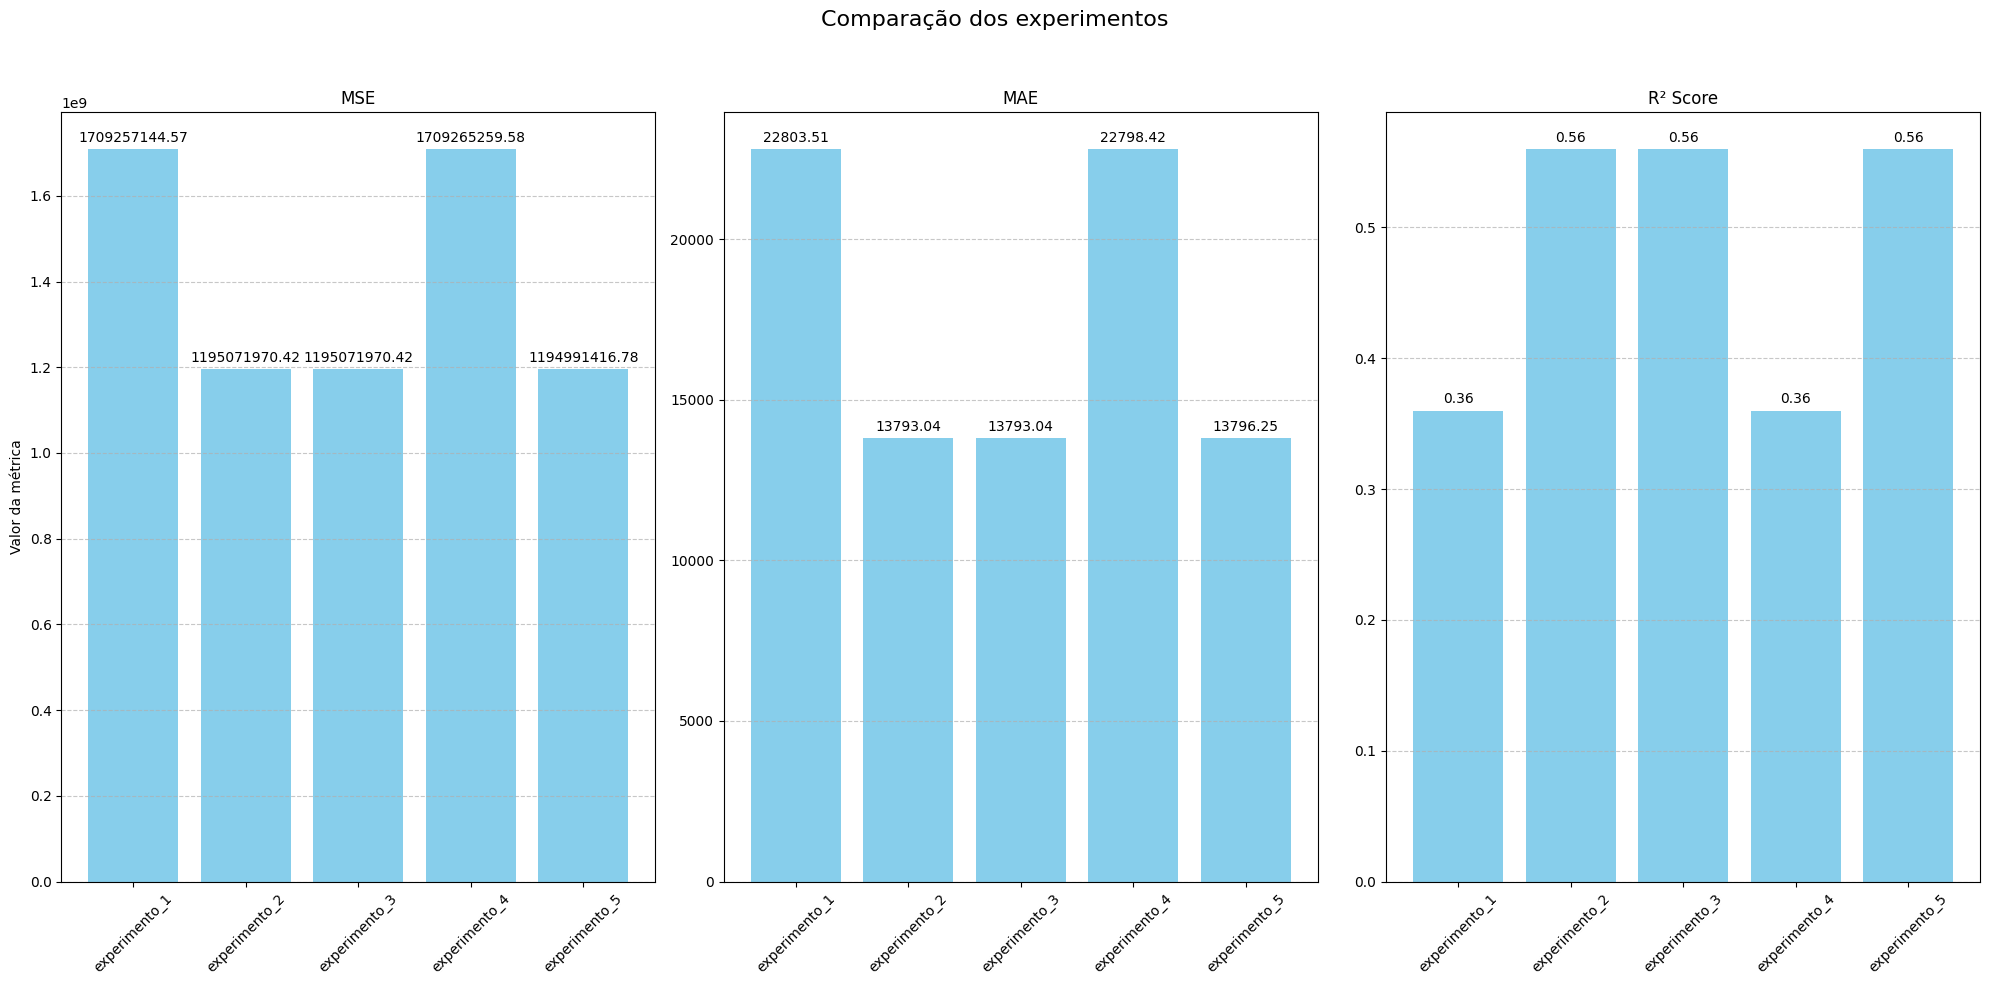

In [553]:
# g. Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R²

metricas = ['MSE', 'MAE', 'R² Score']
num_metrics = len(metricas)
experimentos_nomes = list(experimentos_metricas.keys())
x = np.arange(len(experimentos_nomes))

fig, axes = plt.subplots(1, num_metrics, figsize=(20, 10))

for i, metrica in enumerate(metricas):
    values = [experimentos_metricas[exp][i] for exp in experimentos_nomes]
    bar = axes[i].bar(x, values, color='skyblue')
    axes[i].set_title(metrica)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(experimentos_nomes, rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Label only the first subplot's y-axis
    if i == 0:
        axes[i].set_ylabel("Valor da métrica")

    axes[i].bar_label(bar, padding=3, fmt='%.2f')

plt.suptitle("Comparação dos experimentos", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

h. Dê uma breve explicação (máximo de quatro linhas) sobre qual modelo gerou o melhor resultado e a métrica de avaliação utilizada
* Analisando os experimentos do trabalho pode-se concluir que os modelos que utilizaram apenas as variáveis numéricas originais(year_of_reference e year_model), tiveram o pior desempenho, como pode ser visto no gráfico acima dos experimentos 1 e 4.
* Os experimentos que utilizaram variáveis categórias apresentaram um aumento na acurácia de 36% para 56%.
* Uma curiosidade que mesmo com o aumento da importância de algumas variáveis pelo modelo XGBoost a acurácia permaneceu a mesma do modelo RandomForestRegressor, apresentou apenas uma pequena melhora na MSE e MAE.
* Adicionando parâmetros no modelo RandomForestRegressor não houve um impacto positivo no modelo pois apresentou as mesmas métricas do modelo sem parâmetros como mostrado nos experimentos 2 e 3.

### Conclusão: 
Os modelos a serem considerados são os dos experimentos 2, 3 e 5, que utilizaram variáveis categóricas transformadas. Entre eles, nenhum se destaca significativamente. O experimento 5 apresenta uma leve melhora nas métricas MSE e MAE, porém todos os modelos atingem a mesma acurácia de 56%.